In [1]:
import kagglehub
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

C:\Users\Arkan Raihan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Pengumpulan dan Persiapan Data

In [2]:
path = kagglehub.dataset_download("osamaalarify/playtennis-dataset-113-record")

dataset_path = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        dataset_path = os.path.join(path, file)
        break

df = pd.read_csv(dataset_path)

df.columns = df.columns.str.strip().str.replace('[\"|]', '')
for col in df.columns:
    df[col] = df[col].str.replace(r'^\d+\|\"', '', regex=True).str.rstrip('\"')

## 2. Encode fitur kategorikal

In [ ]:
label_encoders = {}
df_encoded = df.copy()
for column in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

## 3. Pembagian Data (Training dan Testing)

In [5]:
target_column = [col for col in df_encoded.columns if "play" in col.lower() and "tennis" in col.lower()][0]
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Pelatihan Model Decision Tree

In [6]:
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## 5. Evaluasi dengan Confusion Matrix

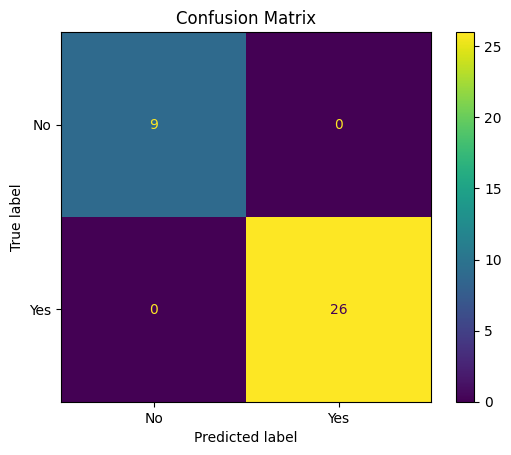

In [9]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
target_column = [col for col in df_encoded.columns if "play" in col.lower() and "tennis" in col.lower()][0]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders[target_column].classes_)

disp.plot()
plt.title("Confusion Matrix")
plt.show()

## 6. Report Hasil Klasifikasi

In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders[target_column].classes_))

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         9
         Yes       1.00      1.00      1.00        26

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



## 7. Visualisasi Decision Tree

[Text(0.3382352941176471, 0.9285714285714286, '|"Outlook <= 0.5\nentropy = 0.991\nsamples = 100.0%\nvalue = [0.443, 0.557]\nclass = Yes'),
 Text(0.27941176470588236, 0.7857142857142857, 'entropy = 0.0\nsamples = 29.1%\nvalue = [0.0, 1.0]\nclass = Yes'),
 Text(0.3088235294117647, 0.8571428571428572, 'True  '),
 Text(0.39705882352941174, 0.7857142857142857, 'Wind <= 0.5\nentropy = 0.954\nsamples = 70.9%\nvalue = [0.625, 0.375]\nclass = No'),
 Text(0.36764705882352944, 0.8571428571428572, '  False'),
 Text(0.11764705882352941, 0.6428571428571429, '|"Outlook <= 1.5\nentropy = 0.381\nsamples = 34.2%\nvalue = [0.926, 0.074]\nclass = No'),
 Text(0.058823529411764705, 0.5, 'entropy = 0.0\nsamples = 21.5%\nvalue = [1.0, 0.0]\nclass = No'),
 Text(0.17647058823529413, 0.5, 'Humidity <= 0.5\nentropy = 0.722\nsamples = 12.7%\nvalue = [0.8, 0.2]\nclass = No'),
 Text(0.11764705882352941, 0.35714285714285715, 'entropy = 0.0\nsamples = 10.1%\nvalue = [1.0, 0.0]\nclass = No'),
 Text(0.23529411764705882,

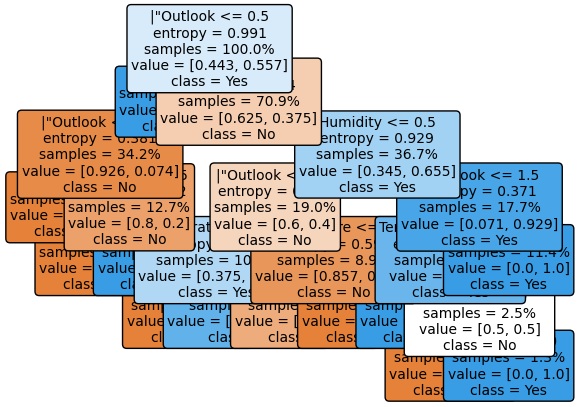

In [13]:
plot_tree(model, 
          feature_names=X.columns, 
          class_names=label_encoders[target_column].classes_, 
          filled=True, 
          rounded=True,
          proportion=True,
          fontsize=10)